In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
test_results = pd.read_csv('test_results.csv')
users = pd.read_csv('user_table.csv')
test_merged = pd.merge(test_results, users, how='left', on='user_id')
test_merged

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
...,...,...,...,...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.97,-118.15
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0,West Seneca,USA,42.84,-78.75
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0,Walnut Creek,USA,37.90,-122.04


Research Question: Does the source of traffic (e.g., ads_facebook, seo-google, etc.) influence the difference in conversion rate under each price?

Null Hypothesis: The source of traffic does not influence the difference in conversion rate under each price.

Alternative Hypothesis: The source of traffic does influence the difference in conversion rate under each price.

In [5]:
raw_data = test_merged.drop(columns=['timestamp', 'device', 'operative_system', 'test', "city", 'lat', 'long', 'country'])
raw_data.head(5)

,user_id,source,price,converted
0,604839,ads_facebook,39,0
1,624057,seo-google,39,0
2,317970,ads-bing,39,0
3,685636,direct_traffic,59,0
4,820854,ads_facebook,39,0


In [15]:
# Define test statistic
def get_test_statistics(source, price, converted):
    grouped = pd.DataFrame({'source': source, 'price': price, 'converted': converted}).groupby(['source', 'price'])['converted'].mean()
    diffs = {s: grouped[s, 39] - grouped[s, 59] for s in source.unique()}
    return np.sum(list(diffs.values()))
observed = get_test_statistics(raw_data['source'], raw_data['price'], raw_data['converted'])

In [16]:
# Simulate under null hypothesis
test_statistics_list = []
for i in range(2000):
    shuffled_source = raw_data['source'].sample(frac=1, replace=False).reset_index(drop=True)
    test_statistics_list.append(get_test_statistics(shuffled_source, raw_data['price'], raw_data['converted']))

In [17]:
p_value = (np.abs(test_statistics_list) >= np.abs(observed)).mean()
print(f"P-value: {p_value}")

P-value: 0.004


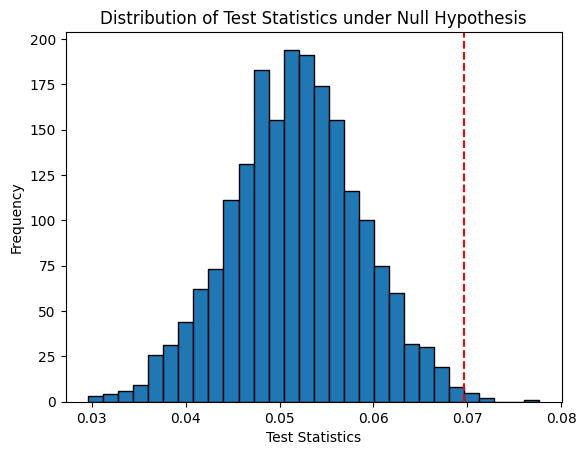

In [23]:
# Visualization
import matplotlib.pyplot as plt

plt.hist(test_statistics_list, bins=30, edgecolor='black')
plt.xlabel('Test Statistics')
plt.ylabel('Frequency')
plt.title('Distribution of Test Statistics under Null Hypothesis')
plt.axvline(x=observed, color='r', linestyle='--', label='Observed Statistic')
plt.show()